# Loading State Boundaries

In [1]:
%pip install geopandas rasterio matplotlib --user

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\dgllife-0.3.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\hyperopt-0.2.7-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import geopandas as gpd
import pandas as pd
# Load the shapefile for India
india_map = gpd.read_file(r'C:\Users\utfu\Documents\aadhar-vista\Shapefiles\India-State-and-Country-Shapefile-Updated-Jan-2020\India_State_Boundary.shp')

# Load your CSV file containing coordinates
#data = pd.read_csv('/content/addhar_centers.csv')
india_map.to_csv('state_polygons.csv')


# Loading District Boundaries

In [3]:
india_district_map= gpd.read_file(r'C:\Users\utfu\Documents\aadhar-vista\Shapefiles\india_district_boundary\india_district_boundary.shp')

In [4]:
india_district_map

,STATE,DIST,geometry
0,ANDAMAN NICOBAR ISLANDS,NICOBAR,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2..."
1,ANDAMAN NICOBAR ISLANDS,SOUTH ANDAMAN,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10..."
2,ANDAMAN NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12..."
3,ANDHRA PRADESH,GUNTUR,"POLYGON ((80.81934 15.74265, 80.81973 15.74426..."
4,ANDHRA PRADESH,CHITTOOR,"POLYGON ((79.44446 13.88893, 79.45083 13.89174..."
...,...,...,...
713,WEST BENGAL,BANKURA,"POLYGON ((87.43880 23.41067, 87.44713 23.40539..."
714,WEST BENGAL,PASCHIM BARDHAMAN,"POLYGON ((87.50792 23.60127, 87.50733 23.58301..."
715,WEST BENGAL,PASHCHIM MEDINIPUR,"POLYGON ((87.23404 21.96042, 87.23706 21.96909..."
716,WEST BENGAL,SOUTH 24 PARGANAS,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


## Loading Aadhar Locations

In [5]:
aadhar=pd.read_csv(r'C:\Users\utfu\Documents\aadhar-vista\DataSources\addhar_centers.csv')
aadhar

,gid,state,lat,long
0,4233336,Maharashtra,17.0076,74.2615
1,4233337,Tamil Nadu,10.7886,79.1310
2,4233338,Karnataka,16.1655,74.8214
3,4233339,Andhra Pradesh,16.1849,81.1353
4,4233340,Tripura,23.9967,91.9957
...,...,...,...,...
75084,4233331,West Bengal,23.2393,87.0604
75085,4233332,Madhya Pradesh,23.1850,75.7768
75086,4233333,Kerala,9.8970,76.3088
75087,4233334,Himachal Pradesh,31.9713,77.1234


## Preprocessing Mumbo Jumbo

In [6]:
india_district_map['state'] = india_district_map['STATE'].apply(lambda x: x.lower() if isinstance(x, str) else x)
india_district_map.drop('STATE', axis=1, inplace=True)
# Display the DataFrame with lowercase strings
india_district_map['state'].unique()

array(['andaman   nicobar islands', 'andhra pradesh', 'arunachal pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra and nagar haveli and daman and diu', 'daman   diu', 'goa',
       'gujarat', 'haryana', 'himachal pradesh', 'jammu   kashmir',
       'jharkhand', 'karnataka', 'kerala', 'lakshadweep',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'nct of delhi', 'odisha', 'puducherry', 'punjab',
       'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura',
       'uttarakhand', 'uttar pradesh', 'west bengal'], dtype=object)

In [7]:
#aadhar.drop('gid', axis=1, inplace=True)
print(aadhar['state'].unique())

['Maharashtra' 'Tamil Nadu' 'Karnataka' 'Andhra Pradesh' 'Tripura'
 'Uttar Pradesh' 'Haryana' 'Himachal Pradesh' 'Kerala' 'Odisha'
 'West Bengal' 'Rajasthan' 'Telangana' 'Punjab' 'Gujarat' 'Jharkhand'
 'Delhi' 'Bihar' 'Madhya Pradesh' 'Mizoram' 'Assam' 'Jammu and Kashmir'
 'Dadra and Nagar Haveli' 'Uttarakhand' 'Chhattisgarh' 'Goa' 'Manipur'
 'Puducherry' 'Sikkim' 'Chandigarh' 'Nagaland' 'Daman and Diu' 'Ladakh'
 'Andaman and Nicobar Islands' 'Arunachal Pradesh' 'Meghalaya'
 'Lakshadweep']


Below is garbage

In [8]:
combined = pd.merge(india_district_map, aadhar, on='state', how="outer")

combined.to_csv('combined.csv')

In [9]:
combined.isnull().sum() 

DIST        75089
geometry    75089
state           0
gid           718
lat           718
long          718
dtype: int64

Garbage ends here 


# Mapping for Maharashtra

In [10]:
maharashtra=aadhar
maharashtra

,gid,state,lat,long
0,4233336,Maharashtra,17.0076,74.2615
1,4233337,Tamil Nadu,10.7886,79.1310
2,4233338,Karnataka,16.1655,74.8214
3,4233339,Andhra Pradesh,16.1849,81.1353
4,4233340,Tripura,23.9967,91.9957
...,...,...,...,...
75084,4233331,West Bengal,23.2393,87.0604
75085,4233332,Madhya Pradesh,23.1850,75.7768
75086,4233333,Kerala,9.8970,76.3088
75087,4233334,Himachal Pradesh,31.9713,77.1234


In [11]:
india_district_map

,DIST,geometry,state
0,NICOBAR,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2...",andaman nicobar islands
1,SOUTH ANDAMAN,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10...",andaman nicobar islands
2,NORTH AND MIDDLE ANDAMAN,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12...",andaman nicobar islands
3,GUNTUR,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",andhra pradesh
4,CHITTOOR,"POLYGON ((79.44446 13.88893, 79.45083 13.89174...",andhra pradesh
...,...,...,...
713,BANKURA,"POLYGON ((87.43880 23.41067, 87.44713 23.40539...",west bengal
714,PASCHIM BARDHAMAN,"POLYGON ((87.50792 23.60127, 87.50733 23.58301...",west bengal
715,PASHCHIM MEDINIPUR,"POLYGON ((87.23404 21.96042, 87.23706 21.96909...",west bengal
716,SOUTH 24 PARGANAS,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",west bengal


In [12]:
maha_district_map=india_district_map
maha_district_map

,DIST,geometry,state
0,NICOBAR,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2...",andaman nicobar islands
1,SOUTH ANDAMAN,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10...",andaman nicobar islands
2,NORTH AND MIDDLE ANDAMAN,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12...",andaman nicobar islands
3,GUNTUR,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",andhra pradesh
4,CHITTOOR,"POLYGON ((79.44446 13.88893, 79.45083 13.89174...",andhra pradesh
...,...,...,...
713,BANKURA,"POLYGON ((87.43880 23.41067, 87.44713 23.40539...",west bengal
714,PASCHIM BARDHAMAN,"POLYGON ((87.50792 23.60127, 87.50733 23.58301...",west bengal
715,PASHCHIM MEDINIPUR,"POLYGON ((87.23404 21.96042, 87.23706 21.96909...",west bengal
716,SOUTH 24 PARGANAS,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",west bengal


In [13]:
from shapely.geometry import Point

# Create a GeoDataFrame from the CSV data
geometry = [Point(xy) for xy in zip(maharashtra.long, maharashtra.lat)]
geo_df = gpd.GeoDataFrame(maharashtra, geometry=geometry, crs=maha_district_map.crs)


In [14]:
geo_df

,gid,state,lat,long,geometry
0,4233336,Maharashtra,17.0076,74.2615,POINT (74.26150 17.00760)
1,4233337,Tamil Nadu,10.7886,79.1310,POINT (79.13100 10.78860)
2,4233338,Karnataka,16.1655,74.8214,POINT (74.82140 16.16550)
3,4233339,Andhra Pradesh,16.1849,81.1353,POINT (81.13530 16.18490)
4,4233340,Tripura,23.9967,91.9957,POINT (91.99570 23.99670)
...,...,...,...,...,...
75084,4233331,West Bengal,23.2393,87.0604,POINT (87.06040 23.23930)
75085,4233332,Madhya Pradesh,23.1850,75.7768,POINT (75.77680 23.18500)
75086,4233333,Kerala,9.8970,76.3088,POINT (76.30880 9.89700)
75087,4233334,Himachal Pradesh,31.9713,77.1234,POINT (77.12340 31.97130)


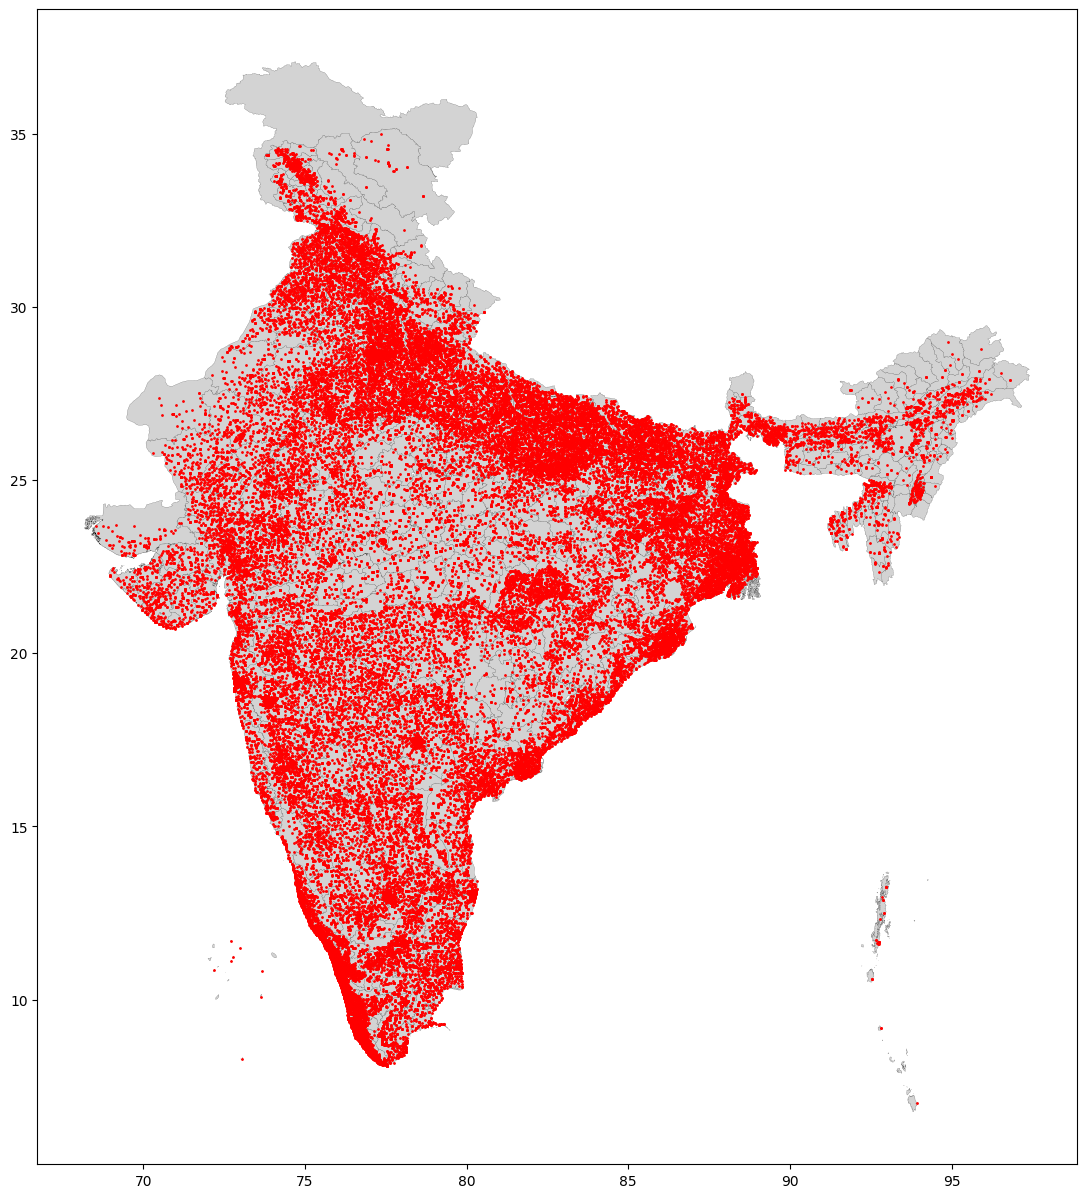

In [15]:
import matplotlib.pyplot as plt


# Plot the map of India
fig, ax = plt.subplots(figsize=(15, 15))
maha_district_map.plot(ax=ax,edgecolor='black', linewidth=0.1 , color='lightgray')

# Plot the points on the map
geo_df.plot(ax=ax, color='red', marker='o', markersize=1)

# Show the plot
plt.show()


TODO
- ~~Map Districts into states~~
- ~~Create a Heatmap of Aadhar centers per district~~
- Census Population Data in each District
- Tif Image in each state


On the quest to make Heatmap

In [16]:
# Load the shapefile containing district boundaries
maha_districts= maha_district_map.drop('state', axis=1)

# Calculate KDE for each district
maha_districts


,DIST,geometry
0,NICOBAR,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2..."
1,SOUTH ANDAMAN,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10..."
2,NORTH AND MIDDLE ANDAMAN,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12..."
3,GUNTUR,"POLYGON ((80.81934 15.74265, 80.81973 15.74426..."
4,CHITTOOR,"POLYGON ((79.44446 13.88893, 79.45083 13.89174..."
...,...,...
713,BANKURA,"POLYGON ((87.43880 23.41067, 87.44713 23.40539..."
714,PASCHIM BARDHAMAN,"POLYGON ((87.50792 23.60127, 87.50733 23.58301..."
715,PASHCHIM MEDINIPUR,"POLYGON ((87.23404 21.96042, 87.23706 21.96909..."
716,SOUTH 24 PARGANAS,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


In [17]:
geo_df

,gid,state,lat,long,geometry
0,4233336,Maharashtra,17.0076,74.2615,POINT (74.26150 17.00760)
1,4233337,Tamil Nadu,10.7886,79.1310,POINT (79.13100 10.78860)
2,4233338,Karnataka,16.1655,74.8214,POINT (74.82140 16.16550)
3,4233339,Andhra Pradesh,16.1849,81.1353,POINT (81.13530 16.18490)
4,4233340,Tripura,23.9967,91.9957,POINT (91.99570 23.99670)
...,...,...,...,...,...
75084,4233331,West Bengal,23.2393,87.0604,POINT (87.06040 23.23930)
75085,4233332,Madhya Pradesh,23.1850,75.7768,POINT (75.77680 23.18500)
75086,4233333,Kerala,9.8970,76.3088,POINT (76.30880 9.89700)
75087,4233334,Himachal Pradesh,31.9713,77.1234,POINT (77.12340 31.97130)


In [18]:
df= pd.read_csv(r'C:\Users\utfu\Documents\aadhar-vista\india-districts-census-2011.csv')
df=df[["District name","Population"]]
df

,District name,Population
0,Kupwara,870354
1,Badgam,753745
2,Leh(Ladakh),133487
3,Kargil,140802
4,Punch,476835
...,...,...
635,Mahe,41816
636,Karaikal,200222
637,Nicobars,36842
638,North AND Middle Andaman,105597


In [19]:
df['DIST'] = df['District name'].str.lower()
df.drop(['District name'], axis=1, inplace=True)
maha_district_map['DIST'] = maha_district_map['DIST'].str.lower()
df['DIST'].unique()


array(['kupwara', 'badgam', 'leh(ladakh)', 'kargil', 'punch', 'rajouri',
       'kathua', 'baramula', 'bandipore', 'srinagar', 'ganderbal',
       'pulwama', 'shupiyan', 'anantnag', 'kulgam', 'doda', 'ramban',
       'kishtwar', 'udhampur', 'reasi', 'jammu', 'samba', 'chamba',
       'kangra', 'lahul and spiti', 'kullu', 'mandi', 'hamirpur', 'una',
       'bilaspur', 'solan', 'sirmaur', 'shimla', 'kinnaur', 'gurdaspur',
       'kapurthala', 'jalandhar', 'hoshiarpur',
       'shahid bhagat singh nagar', 'fatehgarh sahib', 'ludhiana', 'moga',
       'firozpur', 'muktsar', 'faridkot', 'bathinda', 'mansa', 'patiala',
       'amritsar', 'tarn taran', 'rupnagar', 'sahibzada ajit singh nagar',
       'sangrur', 'barnala', 'chandigarh', 'uttarkashi', 'chamoli',
       'rudraprayag', 'tehri garhwal', 'dehradun', 'garhwal',
       'pithoragarh', 'bageshwar', 'almora', 'champawat', 'nainital',
       'udham singh nagar', 'hardwar', 'panchkula', 'ambala',
       'yamunanagar', 'kurukshetra', 'kait

In [20]:
maha_district_map['DIST'].unique()

array(['nicobar', 'south andaman', 'north and middle andaman', 'guntur',
       'chittoor', 'prakasam', 'nellore', 'y.s.r.', 'kurnool',
       'east godavari', 'vishakhapatnam', 'anantapur', 'west godavari',
       'vizianagaram', 'srikakulam', 'krishna', 'upper subansiri',
       'itanagar', 'east kameng', 'changlang', 'west kameng',
       'kra  daadi', 'anjaw', 'east siang', 'upper siang', 'west siang',
       'lohit', 'khonsa', 'tawang', 'dibang valley', 'tirap',
       'kurung kumey', 'siang', 'lower subansiri', 'papumpare',
       'lower dibang valley', 'karbi anglong west', 'kamrup metropolitan',
       'sonitpur', 'cachar', 'dhemaji', 'udalguri', 'golaghat',
       'hailakandi', 'dibrugarh', 'baksa', 'south salmara mankaghar',
       'chirang', 'hojai', 'tinsukia', 'darrang', 'charadeo', 'goalpara',
       'songaigaon', 'kokrajhar', 'barpeta', 'biswanath', 'kamrup',
       'nagaon', 'dhuburi', 'marigaon', 'nalbari', 'majuli', 'karimganj',
       'lakhimpur', 'sivasagar', 'karbi

In [21]:
merged_df = maha_district_map.merge(df, left_on='DIST', right_on='DIST', how='left')
merged_df['DIST'].unique()

array(['nicobar', 'south andaman', 'north and middle andaman', 'guntur',
       'chittoor', 'prakasam', 'nellore', 'y.s.r.', 'kurnool',
       'east godavari', 'vishakhapatnam', 'anantapur', 'west godavari',
       'vizianagaram', 'srikakulam', 'krishna', 'upper subansiri',
       'itanagar', 'east kameng', 'changlang', 'west kameng',
       'kra  daadi', 'anjaw', 'east siang', 'upper siang', 'west siang',
       'lohit', 'khonsa', 'tawang', 'dibang valley', 'tirap',
       'kurung kumey', 'siang', 'lower subansiri', 'papumpare',
       'lower dibang valley', 'karbi anglong west', 'kamrup metropolitan',
       'sonitpur', 'cachar', 'dhemaji', 'udalguri', 'golaghat',
       'hailakandi', 'dibrugarh', 'baksa', 'south salmara mankaghar',
       'chirang', 'hojai', 'tinsukia', 'darrang', 'charadeo', 'goalpara',
       'songaigaon', 'kokrajhar', 'barpeta', 'biswanath', 'kamrup',
       'nagaon', 'dhuburi', 'marigaon', 'nalbari', 'majuli', 'karimganj',
       'lakhimpur', 'sivasagar', 'karbi

In [22]:
merged_df.tail()


,DIST,geometry,state,Population
723,bankura,"POLYGON ((87.43880 23.41067, 87.44713 23.40539...",west bengal,3596674.0
724,paschim bardhaman,"POLYGON ((87.50792 23.60127, 87.50733 23.58301...",west bengal,NaN
725,pashchim medinipur,"POLYGON ((87.23404 21.96042, 87.23706 21.96909...",west bengal,NaN
726,south 24 parganas,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",west bengal,NaN
727,north 24 parganas,"MULTIPOLYGON (((88.83472 21.60722, 88.83500 21...",west bengal,NaN


In [23]:
average_population_by_state = merged_df.groupby('state')['Population'].mean()

# Fill missing population values with average population of districts in the same state
for state, avg_population in average_population_by_state.items():
    merged_df.loc[(merged_df['state'] == state) & merged_df['Population'].isnull(), 'Population'] = avg_population

merged_df.tail()

,DIST,geometry,state,Population
723,bankura,"POLYGON ((87.43880 23.41067, 87.44713 23.40539...",west bengal,3.596674e+06
724,paschim bardhaman,"POLYGON ((87.50792 23.60127, 87.50733 23.58301...",west bengal,4.126703e+06
725,pashchim medinipur,"POLYGON ((87.23404 21.96042, 87.23706 21.96909...",west bengal,4.126703e+06
726,south 24 parganas,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",west bengal,4.126703e+06
727,north 24 parganas,"MULTIPOLYGON (((88.83472 21.60722, 88.83500 21...",west bengal,4.126703e+06


In [24]:
merged_df.drop('geometry',axis=1,inplace=True)
merged_df

,DIST,state,Population
0,nicobar,andaman nicobar islands,2.381420e+05
1,south andaman,andaman nicobar islands,2.381420e+05
2,north and middle andaman,andaman nicobar islands,2.381420e+05
3,guntur,andhra pradesh,4.887813e+06
4,chittoor,andhra pradesh,4.174064e+06
...,...,...,...
723,bankura,west bengal,3.596674e+06
724,paschim bardhaman,west bengal,4.126703e+06
725,pashchim medinipur,west bengal,4.126703e+06
726,south 24 parganas,west bengal,4.126703e+06


In [25]:
joined = gpd.sjoin(geo_df, maha_district_map, op='within')
joined


C:\Users\utfu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,gid,state_left,lat,long,geometry,index_right,DIST,state_right
0,4233336,Maharashtra,17.0076,74.2615,POINT (74.26150 17.00760),367,sangli,maharashtra
145,4233481,Maharashtra,17.0916,74.4577,POINT (74.45770 17.09160),367,sangli,maharashtra
172,4233508,Maharashtra,16.8528,74.5786,POINT (74.57860 16.85280),367,sangli,maharashtra
268,4233604,Maharashtra,17.2022,74.3487,POINT (74.34870 17.20220),367,sangli,maharashtra
296,4233632,Maharashtra,17.0253,74.3705,POINT (74.37050 17.02530),367,sangli,maharashtra
...,...,...,...,...,...,...,...,...
62313,4220701,Manipur,24.8570,93.6180,POINT (93.61800 24.85700),395,noney,manipur
65766,4224149,Arunachal Pradesh,26.8861,95.3172,POINT (95.31720 26.88610),27,khonsa,arunachal pradesh
69003,4227280,Arunachal Pradesh,26.8862,95.3175,POINT (95.31750 26.88620),27,khonsa,arunachal pradesh
68066,4226342,Nagaland,26.4903,94.8154,POINT (94.81540 26.49030),423,longleng,nagaland


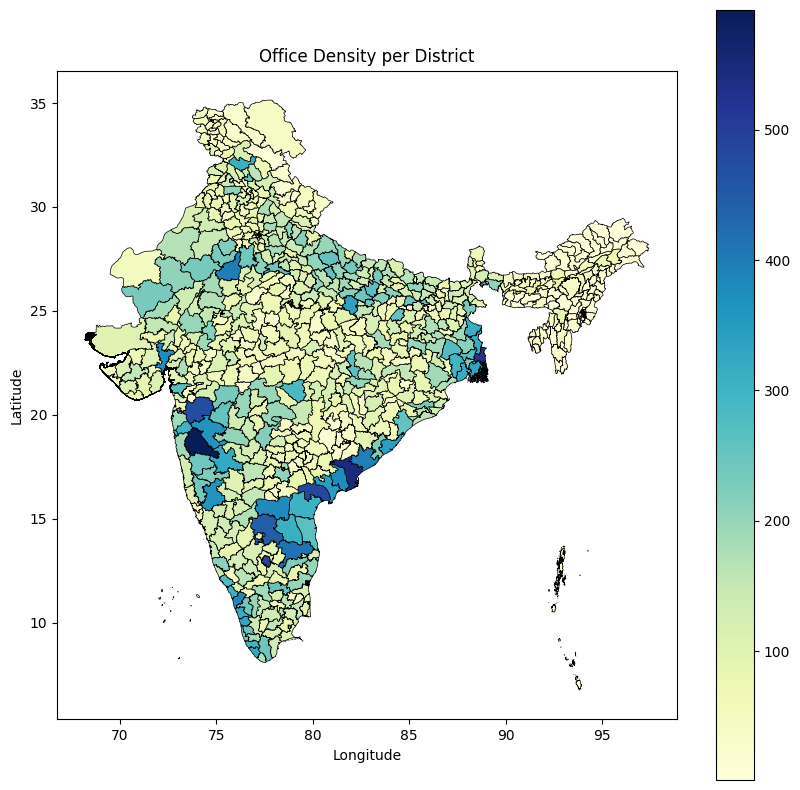

In [26]:
office_counts = joined.groupby('DIST').size().reset_index(name='office_count')

# Merge counts with district boundaries GeoDataFrame
districts_with_counts = maha_district_map.merge(office_counts, how='left', left_on='DIST', right_on='DIST')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 10))
districts_with_counts.plot(column='office_count', cmap='YlGnBu', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

# Set plot title and labels
plt.title('Office Density per District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [27]:
districts_with_counts

,DIST,geometry,state,office_count
0,nicobar,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2...",andaman nicobar islands,3.0
1,south andaman,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10...",andaman nicobar islands,11.0
2,north and middle andaman,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12...",andaman nicobar islands,9.0
3,guntur,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",andhra pradesh,483.0
4,chittoor,"POLYGON ((79.44446 13.88893, 79.45083 13.89174...",andhra pradesh,412.0
...,...,...,...,...
713,bankura,"POLYGON ((87.43880 23.41067, 87.44713 23.40539...",west bengal,278.0
714,paschim bardhaman,"POLYGON ((87.50792 23.60127, 87.50733 23.58301...",west bengal,135.0
715,pashchim medinipur,"POLYGON ((87.23404 21.96042, 87.23706 21.96909...",west bengal,298.0
716,south 24 parganas,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",west bengal,332.0


In [28]:
districts_with_counts['DIST'] = districts_with_counts['DIST'].str.lower()
districts_with_counts= districts_with_counts.merge(merged_df, how='left', left_on='DIST', right_on='DIST')


In [29]:
districts_with_counts

,DIST,geometry,state_x,office_count,state_y,Population
0,nicobar,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2...",andaman nicobar islands,3.0,andaman nicobar islands,2.381420e+05
1,south andaman,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10...",andaman nicobar islands,11.0,andaman nicobar islands,2.381420e+05
2,north and middle andaman,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12...",andaman nicobar islands,9.0,andaman nicobar islands,2.381420e+05
3,guntur,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",andhra pradesh,483.0,andhra pradesh,4.887813e+06
4,chittoor,"POLYGON ((79.44446 13.88893, 79.45083 13.89174...",andhra pradesh,412.0,andhra pradesh,4.174064e+06
...,...,...,...,...,...,...
749,bankura,"POLYGON ((87.43880 23.41067, 87.44713 23.40539...",west bengal,278.0,west bengal,3.596674e+06
750,paschim bardhaman,"POLYGON ((87.50792 23.60127, 87.50733 23.58301...",west bengal,135.0,west bengal,4.126703e+06
751,pashchim medinipur,"POLYGON ((87.23404 21.96042, 87.23706 21.96909...",west bengal,298.0,west bengal,4.126703e+06
752,south 24 parganas,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",west bengal,332.0,west bengal,4.126703e+06


In [30]:
from sklearn.preprocessing import MinMaxScaler
districts_with_counts['office_count']
districts_with_counts['Center_Busyness'] = districts_with_counts['office_count'] / districts_with_counts['Population']
# Calculate the minimum and maximum values of the 'Center_Busyness' column
scaler = MinMaxScaler()
data_to_scale = districts_with_counts['Center_Busyness'].values.reshape(-1, 1)
districts_with_counts['normalised']=scaler.fit_transform(data_to_scale)


In [31]:
districts_with_counts

,DIST,geometry,state_x,office_count,state_y,Population,Center_Busyness,normalised
0,nicobar,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2...",andaman nicobar islands,3.0,andaman nicobar islands,2.381420e+05,0.000013,0.013836
1,south andaman,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10...",andaman nicobar islands,11.0,andaman nicobar islands,2.381420e+05,0.000046,0.063036
2,north and middle andaman,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12...",andaman nicobar islands,9.0,andaman nicobar islands,2.381420e+05,0.000038,0.050736
3,guntur,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",andhra pradesh,483.0,andhra pradesh,4.887813e+06,0.000099,0.140111
4,chittoor,"POLYGON ((79.44446 13.88893, 79.45083 13.89174...",andhra pradesh,412.0,andhra pradesh,4.174064e+06,0.000099,0.139947
...,...,...,...,...,...,...,...,...
749,bankura,"POLYGON ((87.43880 23.41067, 87.44713 23.40539...",west bengal,278.0,west bengal,3.596674e+06,0.000077,0.108588
750,paschim bardhaman,"POLYGON ((87.50792 23.60127, 87.50733 23.58301...",west bengal,135.0,west bengal,4.126703e+06,0.000033,0.043298
751,pashchim medinipur,"POLYGON ((87.23404 21.96042, 87.23706 21.96909...",west bengal,298.0,west bengal,4.126703e+06,0.000072,0.101147
752,south 24 parganas,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",west bengal,332.0,west bengal,4.126703e+06,0.000080,0.113214


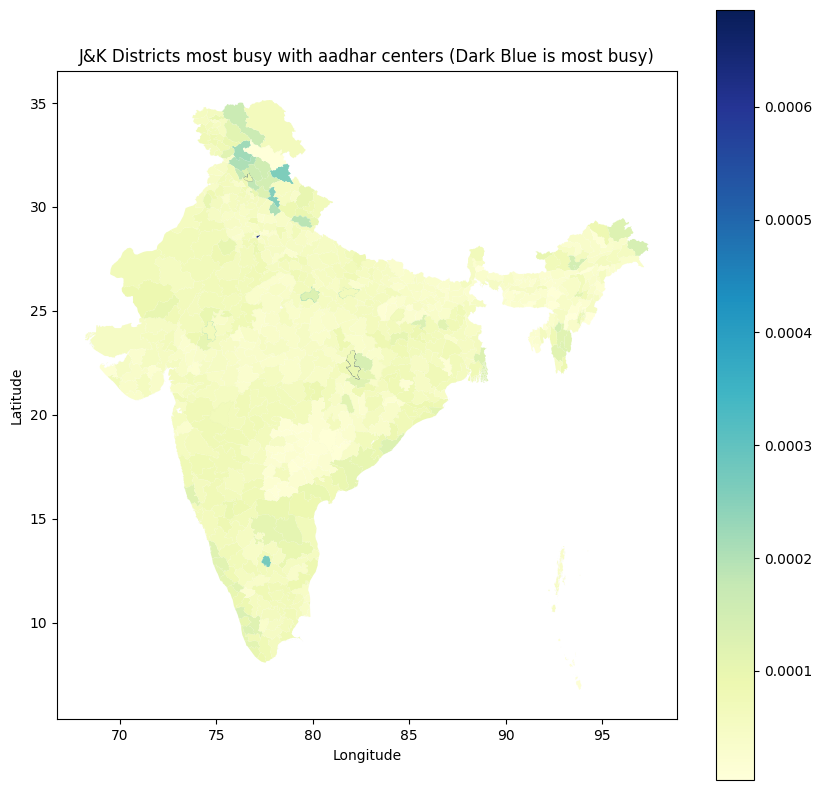

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
districts_with_counts.plot(column='Center_Busyness', cmap='YlGnBu', linewidth=0.5, ax=ax, legend=True)
for idx, row in districts_with_counts.iterrows():
    # Adjust the label position (here using centroid of the geometry) for better visibility
    label_position = (row.geometry.centroid.x, row.geometry.centroid.y)
    
    # Add district labels to the plot
    #ax.annotate(text=row['DIST'], xy=label_position, horizontalalignment='center', fontsize=8, color='black')
# Set plot title and labels
plt.title('J&K Districts most busy with aadhar centers (Dark Blue is most busy)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
districts_with_counts.to_csv('districts_with_counts.csv')

In [ ]:
districts_with_counts.dropna(inplace=True)
districts_with_counts.to_csv('districts_with_counts.csv')

Raster Data Working

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the TIF file (Replace 'india.tif' with the actual file path)
with rasterio.open('2022_India.tif') as src:
    india_image = src.read()  # Load the image
    metadata = src.meta 
    raster_crs = src.crs
    plt.figure(figsize=(8, 8))
    plt.imshow(india_image.transpose(1, 2, 0))  # Adjust the colormap as needed
    plt.colorbar(label='Pixel Value')  # Add colorbar indicating pixel values
    plt.title('Plot of GeoTIFF')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

    # Get metadata (such as CRS, transform)


In [ ]:
metadata

## Plotting All the Shapes individually inside the tif file

In [ ]:
import fiona
from shapely.geometry import shape
from rasterio.warp import transform_geom
from rasterio.mask import mask
# Open the shapefile containing state boundaries

with fiona.open("India_State_Boundary.shp", "r") as shapefile:
    # Read the raster image
    with rasterio.open("2022_India.tif") as src:  # Replace with your raster file path
        raster_crs = src.crs
        metadata = src.meta

        # Loop through each feature in the shapefile
        for feature in shapefile:
            # Convert the geometry to the raster CRS
            geom = shape(feature["geometry"])
            reprojected_geom = transform_geom(shapefile.crs, raster_crs, geom)

            # Mask the raster image using the transformed geometry
            masked_image, _ = mask(src, [reprojected_geom], crop=True)
            plt.figure(figsize=(15, 15))
            plt.imshow(masked_image.transpose((1, 2, 0)))  # Adjust the colormap as needed
            plt.colorbar(label='Pixel Value')  # Add colorbar indicating pixel values
            plt.title(f"Masked Image for {feature['properties']['State_Name']}, ")
            plt.xlabel('Column')
            plt.ylabel('Row')
            output_path_img = f"state_ntl/plot_{feature['properties']['State_Name']}.png"
            plt.savefig(output_path_img)
            plt.show()
            plt.clf()
            plt.close()
            
            output_path = f"state_ntl/output{feature['properties']['State_Name']}.tif"
            output_meta = metadata  # Use the metadata from the original raster or adjust as needed

# Update metadata if needed
# For example, if you're changing the data type or other metadata, update here before writing

# Write the three-band image to a new TIFF file
            with rasterio.open(output_path, "w", **output_meta) as dst:
                dst.write(masked_image)
                plt.savefig(f"state_ntl/masked_image_{feature['properties']['State_Name']}.png")  # Write the three-band image data
            # Perform operations with the masked_image (e.g., save, process, or plot)
            # For example, save each masked image with a unique identifier
            #rasterio.imwrite(f"masked_image_{feature['properties']['State_Name']}.tif", masked_image)
            

Something is wrong with the tif files!


Plotting Aadhar Centres

In [ ]:
import geopandas
gdf = geopandas.GeoDataFrame( geometry=geo_df['geometry'], crs=metadata['crs'], index=geo_df.index)
gdf

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Read the raster image
with rasterio.open("jkntltif.tif") as src:  # Replace with your raster file path
    raster_data = src.read()  # Read the raster data

# Generate some sample point coordinates (replace this with your actual points)


# Convert point coordinates to a GeoDataFrame
#points_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in point_coords], crs="EPSG:4326")

# Plot the raster image
plt.figure(figsize=(30, 30))
gdf.plot(marker='o', color='red', markersize=1)
plt.imshow(raster_data.transpose(1, 2, 0))  # Transpose for RGB representation (if applicable)
plt.title('Raster Image with Points')
plt.xlabel('Column')
plt.ylabel('Row')

# Plot the points on top of the raster image


plt.show()


District-wise mapping


In [ ]:
india_district_map= gpd.read_file('india_district_boundary\india_district_boundary.shp')

In [ ]:
india_district_map.to_csv('district_polygons.csv')

In [ ]:
jnk_district_map=india_district_map[india_district_map['STATE']=='JAMMU   KASHMIR']
jnk_district_map.to_csv('jnk.csv')

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads

# Read the CSV file into a DataFrame
df = pd.read_csv('jnk.csv')

# Convert the 'geometry' column to Shapely geometry objects
df['geometry'] = df['geometry'].apply(loads)

# Create a GeoDataFrame
jnkgdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

# Save the GeoDataFrame to a shapefile
jnkgdf.to_file('jnk_shapefile.shp', driver='ESRI Shapefile')


In [ ]:
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

src = rasterio.open("jkntltif.tif")

districts_gdf = gpd.read_file("jnk_shapefile.shp")
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(10, 10))

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")
gdf.plot(ax=ax, markersize=5, marker='o', color='green')  # Adjust marker size and appearance
districts_gdf.plot(ax=ax,  linewidth=0.5, edgecolor='blue', alpha=0.7, facecolor='none')

plt.savefig('jnkNTL.svg')
#gdf.plot(ax=ax)

Loading NTL Countour Data

In [ ]:
import geopandas as gpd

cntr= gpd.read_file('jnkcountour.shp')

#taking only 200 NTL data (urban areas)
cntr=cntr[cntr['ELEV']==200]
cntr

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")
gdf.plot(ax=ax, markersize=4, marker='o', color='green', alpha=0.7)  # Adjust marker size and appearance
cntr.plot(ax=ax,  linewidth=0.5, edgecolor='blue', alpha=0.7, facecolor='none')

#plt.savefig('jnkNTL.svg')
#gdf.plot(ax=ax)

In [ ]:
is_closed = cntr['geometry'].iloc[0].is_closed
print("Is Linestring Closed:", is_closed)

In [ ]:
from shapely.geometry import LineString, Polygon

cntr['geometry'] = cntr['geometry'].apply(lambda x: Polygon(x))

#cntr.to_csv('cntr.csv')
cntr

Now Taking Points only inside the Urban Areas

In [ ]:
joined_data = gpd.sjoin(gdf, cntr, how='inner', op='intersects')

# Print the resulting joined data
joined_data.to_csv('urbanpoints.csv')
joined_data

Plotting the points inside the polygons

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the linestrings from cntr and points from gdf
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the linestrings
cntr.plot(ax=ax, color='blue', alpha=0.5)

# Plot the points
joined_data.plot(ax=ax, color='red', markersize=10)

plt.show()


Taking in Rural Points as (All points - Urban Points)

In [ ]:
joined_data['geometry']

In [ ]:
gdf['geometry']

In [ ]:
set1 = set(gdf['geometry'])
set2 = set(joined_data['geometry'])

# Find the difference between the two sets
disjoint_geometries = set1 - set2

disjoint_geometries

In [ ]:
result_gdf = gpd.GeoDataFrame(geometry=list(disjoint_geometries))
result_gdf

In [ ]:
result_gdf.to_csv('ruralpoints.csv')
